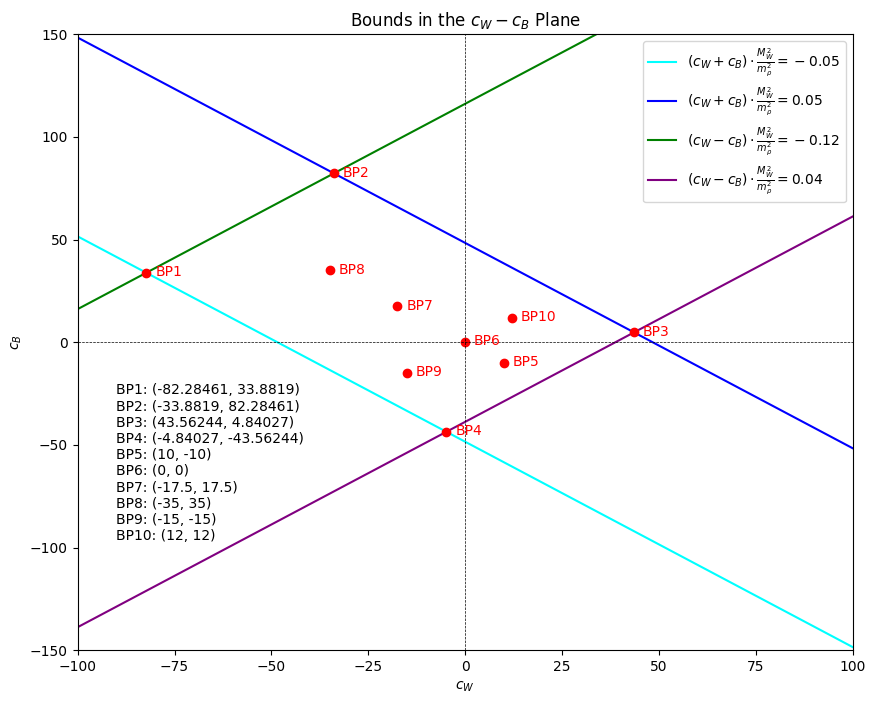

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Define the lines
def line1(cW):
    return -48.4177 - cW

def line2(cW):
    return 48.4177 - cW

def line3(cW):
    return cW + 116.175

def line4(cW):
    return cW - 38.725

# Calculate intersection points
def find_intersections():
    intersections = []
    
    # line1 and line2
    cW = np.linspace(-100, 100, 400)
    y1 = line1(cW)
    y2 = line2(cW)
    idx = np.argwhere(np.isclose(y1, y2, atol=1e-3)).flatten()
    intersections.extend([(cW[i], y1[i]) for i in idx])
    
    # line1 and line3
    idx = np.argwhere(np.isclose(y1, line3(cW), atol=1e-3)).flatten()
    intersections.extend([(cW[i], y1[i]) for i in idx])
    
    # line1 and line4
    idx = np.argwhere(np.isclose(y1, line4(cW), atol=1e-3)).flatten()
    intersections.extend([(cW[i], y1[i]) for i in idx])
    
    # line2 and line3
    idx = np.argwhere(np.isclose(y2, line3(cW), atol=1e-3)).flatten()
    intersections.extend([(cW[i], y2[i]) for i in idx])
    
    # line2 and line4
    idx = np.argwhere(np.isclose(y2, line4(cW), atol=1e-3)).flatten()
    intersections.extend([(cW[i], y2[i]) for i in idx])
    
    # line3 and line4
    idx = np.argwhere(np.isclose(line3(cW), line4(cW), atol=1e-3)).flatten()
    intersections.extend([(cW[i], line3(cW[i])) for i in idx])
    
    return intersections

# Get intersection points
intersections = find_intersections()

# Benchmark points
benchmark_points = {
    'BP1': (-82.28461, 33.8819),
    'BP2': (-33.8819, 82.28461),
    'BP3': (43.56244, 4.84027),
    'BP4': (-4.84027, -43.56244),
    'BP5': (10, -10),
    'BP6': (0, 0),
    'BP7': (-17.5, 17.5),
    'BP8': (-35, 35),
    'BP9': (-15, -15),  # New benchmark point
    'BP10': (12, 12)    # New benchmark point
}

# Prepare data for plotting
cW = np.linspace(-100, 100, 400)
plt.figure(figsize=(10, 8))
plt.plot(cW, line1(cW), label=r'$\left(c_W + c_B\right) \cdot \frac{M_W^2}{m_\rho^2} = -0.05$', color='cyan')
plt.plot(cW, line2(cW), label=r'$\left(c_W + c_B\right) \cdot \frac{M_W^2}{m_\rho^2} = 0.05$', color='blue')
plt.plot(cW, line3(cW), label=r'$\left(c_W - c_B\right) \cdot \frac{M_W^2}{m_\rho^2} = -0.12$', color='green')
plt.plot(cW, line4(cW), label=r'$\left(c_W - c_B\right) \cdot \frac{M_W^2}{m_\rho^2} = 0.04$', color='purple')

for x, y in intersections:
    plt.plot(x, y, 'ko', markersize=6)  # 'ko' is the color black for points
    # Annotate the points with an arrow and adjust the position
    plt.annotate(f'({x:.3f}, {y:.3f})', xy=(x, y), xytext=(x + 1800, y + 1600),  # Adjust the offsets here
                 fontsize=10, color='black', 
                 arrowprops=dict(arrowstyle='->', color='black', lw=1))

# Plot benchmark points with adjusted offsets
for label, (x, y) in benchmark_points.items():
    plt.plot(x, y, 'ro')  # 'ro' is the color red for benchmark points
    plt.text(x+2.3, y - 3, f'{label}', fontsize=10, verticalalignment='bottom', color='red')  # Adjusting the y offset here

# Add a box with benchmark point coordinates
box_text = "\n".join([f"{label}: {coords}" for label, coords in benchmark_points.items()])
plt.text(-90, -20, box_text, fontsize=10, verticalalignment='top', color='black')

# Customize plot
plt.xlim(-100, 100)
plt.ylim(-150, 150)
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.xlabel(r'$c_W$')
plt.ylabel(r'$c_B$')
plt.title(r'Bounds in the $c_W - c_B$ Plane')
plt.grid(False)  # Turn off grid
plt.legend()
plt.savefig('cw_cb.pdf')
plt.show()


In [67]:
import numpy as np

# Constants
f = 1000  # Compositeness scale in GeV
mw = 80.379  # W boson mass in GeV
pi = np.pi
v = 246  # Higgs vacuum expectation value in GeV

# Bounds for ch_bar, chw_bar, and chb_bar
ch_bar_min, ch_bar_max = -2.3, 0.1
chw_bar_min, chw_bar_max = -0.03, 0.03
chb_bar_min, chb_bar_max = -0.05, 0.02

# Relations
# ch_bar = ch * (v^2 / f^2)
# chw_bar = chw * (mw^2 / (16 * pi^2 * f^2))
# chb_bar = chb * (mw^2 / (16 * pi^2 * f^2))

# Solve for ch, chw, chb
ch_min = ch_bar_min * (f**2 / v**2)
ch_max = ch_bar_max * (f**2 / v**2)

chw_min = chw_bar_min * (16 * pi**2 * f**2) / mw**2
chw_max = chw_bar_max * (16 * pi**2 * f**2) / mw**2

chb_min = chb_bar_min * (16 * pi**2 * f**2) / mw**2
chb_max = chb_bar_max * (16 * pi**2 * f**2) / mw**2

# Print the bounds
print(f"Bounds on ch: [{ch_min}, {ch_max}]")
print(f"Bounds on chw: [{chw_min}, {chw_max}]")
print(f"Bounds on chb: [{chb_min}, {chb_max}]")


Bounds on ch: [-38.00647762575186, 1.6524555489457335]
Bounds on chw: [-733.2562697904607, 733.2562697904607]
Bounds on chb: [-1222.0937829841012, 488.83751319364046]


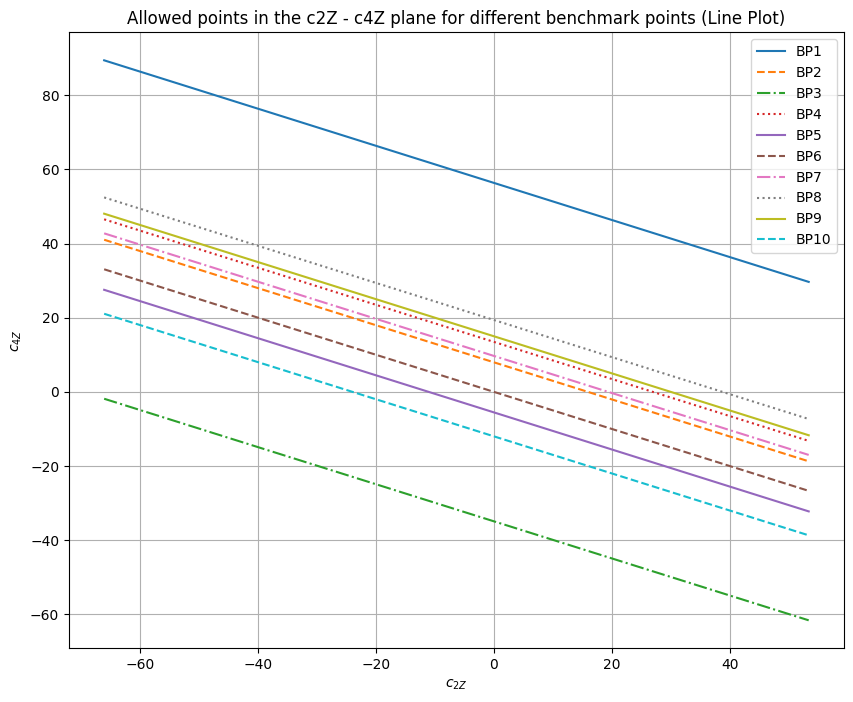

In [68]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
bounds = {
    'c_H': [-38.00647762575186, 1.6524555489457335],
    'c_HW': [-733.2927610948142, 733.2927610948142],
    'c_HB': [-1222.1546018246904, 488.8618407298761],
}
s_theta_square = 0.22305
c_theta_square = 0.77695
m_rho = 2500
f = 1000
pi = np.pi

# Benchmark points for c_W and c_B
benchmarks = {
    'BP1': (-82.28461, 33.8819),
    'BP2': (-33.8819, 82.28461),
    'BP3': (43.56244, 4.84027),
    'BP4': (-4.84027, -43.56244),
    'BP5': (10, -10),
    'BP6': (0, 0),
    'BP7': (-17.5, 17.5),
    'BP8': (-35, 35),
    'BP9': (-15, -15),
    'BP10': (12, 12)
}

# Precompute (m_rho / (4 * pi * f))^2
factor = (m_rho / (4 * pi * f)) ** 2

# Number of samples
n_samples = 10000

# Sampling random values for c_H, c_HW, c_HB within their bounds
c_H_samples = np.random.uniform(bounds['c_H'][0], bounds['c_H'][1], n_samples)
c_HW_samples = np.random.uniform(bounds['c_HW'][0], bounds['c_HW'][1], n_samples)
c_HB_samples = np.random.uniform(bounds['c_HB'][0], bounds['c_HB'][1], n_samples)

# Create a figure
plt.figure(figsize=(10, 8))

# Line styles for different benchmarks
line_styles = ['-', '--', '-.', ':', '-', '--', '-.', ':', '-', '--']

# Loop over each benchmark point
for i, (label, (c_W, c_B)) in enumerate(benchmarks.items()):
    # Calculate c2Z and c4Z for each sample for the current benchmark
    c2Z_samples = 2 * (c_theta_square * c_HW_samples + s_theta_square * c_HB_samples) * factor
    c4Z_samples = -1 * (c_theta_square * (c_W + c_HW_samples * factor) + s_theta_square * (c_B + c_HB_samples * factor))
    
    # Sort samples to ensure continuous lines
    sorted_indices = np.argsort(c2Z_samples)
    c2Z_samples_sorted = c2Z_samples[sorted_indices]
    c4Z_samples_sorted = c4Z_samples[sorted_indices]
    
    # Plotting each benchmark's result with a line style
    plt.plot(c2Z_samples_sorted, c4Z_samples_sorted, line_styles[i], label=label)

# Set plot title and labels
plt.title('Allowed points in the c2Z - c4Z plane for different benchmark points (Line Plot)')
plt.xlabel('$c_{2Z}$')
plt.ylabel('$c_{4Z}$')
plt.grid(True)
plt.legend(loc='upper right')  # Show legend
plt.savefig('bounds.pdf')
# Show the plot
plt.show()


In [69]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from tqdm import tqdm  # Import tqdm for the progress bar

# Constants
s_theta_square = 0.22305
c_theta_square = 0.77695
m_pho = 2500
f = 1000
pi = np.pi

# Bounds
bounds = {
    'c_H': [-38.00647762575186, 1.6524555489457335],
    'c_W': [-82.23095954936447, 43.53403740848707],
    'c_B': [4.837115267609676, 33.859806873267715],
    'c_HW': [-733.2927610948142, 733.2927610948142],
    'c_HB': [-1222.1546018246904, 488.8618407298761],
}

# Create sliders for each variable with proper min and max
c_H_slider = widgets.FloatSlider(value=np.mean(bounds['c_H']), min=bounds['c_H'][0], max=bounds['c_H'][1], description='c_H')
c_W_slider = widgets.FloatSlider(value=np.mean(bounds['c_W']), min=bounds['c_W'][0], max=bounds['c_W'][1], description='c_W')
c_B_slider = widgets.FloatSlider(value=np.mean(bounds['c_B']), min=bounds['c_B'][0], max=bounds['c_B'][1], description='c_B')
c_HW_slider = widgets.FloatSlider(value=np.mean(bounds['c_HW']), min=bounds['c_HW'][0], max=bounds['c_HW'][1], description='c_HW')
c_HB_slider = widgets.FloatSlider(value=np.mean(bounds['c_HB']), min=bounds['c_HB'][0], max=bounds['c_HB'][1], description='c_HB')

# Function to sample allowed coordinates
def sample_coordinates(num_samples=5000):  # Set to sample a larger number of points
    allowed_coordinates = []
    for _ in tqdm(range(num_samples), desc="Sampling Coordinates"):
        # Randomly sample values within the defined bounds
        c_H = np.random.uniform(*bounds['c_H'])
        c_W = np.random.uniform(*bounds['c_W'])
        c_B = np.random.uniform(*bounds['c_B'])
        c_HW = np.random.uniform(*bounds['c_HW'])
        c_HB = np.random.uniform(*bounds['c_HB'])
        
        # Calculate c2Z, c4Z, and check conditions (e.g., within a certain range)
        c2Z = 2 * (c_theta_square * c_HW + s_theta_square * c_HB) * (m_pho / (4 * pi * f)) ** 2
        c4Z = -1 * (c_theta_square * (c_W + c_HW * (m_pho / (4 * pi * f)) ** 2) +
                     s_theta_square * (c_B + c_HB * (m_pho / (4 * pi * f)) ** 2))
        
        # Append coordinates if they meet the desired conditions
        if -100 < c2Z < 100 and -100 < c4Z < 100:
            allowed_coordinates.append((c2Z, c4Z))
    
    return allowed_coordinates

# Function to update the plot based on slider values and sample coordinates
def update_plot(c_H, c_W, c_B, c_HW, c_HB):
    # Sample allowed coordinates
    allowed_coordinates = sample_coordinates()  # Sampling 5000 points here
    
    # Clear previous plots
    plt.clf()

    # Scatter plot for allowed coordinates
    if allowed_coordinates:
        c2Zs, c4Zs = zip(*allowed_coordinates)
        plt.scatter(c2Zs, c4Zs, label='Allowed Coordinates', color='cyan', s=10)  # Smaller point size
    else:
        plt.text(0, 0, 'No allowed coordinates found', fontsize=12, ha='center', color='red')

    # Calculate current values
    c2Z = 2 * (c_theta_square * c_HW + s_theta_square * c_HB) * (m_pho / (4 * pi * f)) ** 2
    c4Z = -1 * (c_theta_square * (c_W + c_HW * (m_pho / (4 * pi * f)) ** 2) +
                 s_theta_square * (c_B + c_HB * (m_pho / (4 * pi * f)) ** 2))
    
    # Annotate and display the current selected point in larger size
    plt.scatter(c2Z, c4Z, color='red', s=100, label=f'Selected Point: ({c2Z:.2f}, {c4Z:.2f})')  # Large red point for selected coordinate
    
    # Annotate the coordinates for c2Z and c4Z near the point
    plt.annotate(f'c2Z: {c2Z:.2f}', 
                 xy=(c2Z, c4Z), 
                 xytext=(5, 5), 
                 textcoords='offset points', 
                 fontsize=10, 
                 color='black')

    plt.annotate(f'c4Z=c5Z: {c4Z:.2f}', 
                 xy=(c2Z, c4Z), 
                 xytext=(5, -15), 
                 textcoords='offset points', 
                 fontsize=10, 
                 color='black')

    plt.title('Allowed Region in c2Z vs c4Z=c5Z plane')
    plt.xlabel('c2Z')
    plt.ylabel('c4Z=c5Z')
    plt.axhline(0, color='grey', linestyle='--', lw=0.8)
    plt.axvline(0, color='grey', linestyle='--', lw=0.8)
    plt.grid(False)
    plt.xlim(-100, 100)  # Adjust based on expected range
    plt.ylim(-100, 100)  # Adjust based on expected range
    plt.legend(loc='upper right')  # Show legend with coordinates
    
    # Save plot as PDF
    plt.savefig('allowed_region_plot.pdf', format='pdf')

    # Show the plot
    plt.show()

# Create interactive widgets
interactive_plot = widgets.interactive(update_plot, 
                                        c_H=c_H_slider, 
                                        c_W=c_W_slider, 
                                        c_B=c_B_slider, 
                                        c_HW=c_HW_slider, 
                                        c_HB=c_HB_slider)

# Display the sliders and interactive plot
display(interactive_plot)

# Display bounds
print("Bounds:")
for key, value in bounds.items():
    print(f"{key}: {value}")

interactive(children=(FloatSlider(value=-18.177011038403066, description='c_H', max=1.6524555489457335, min=-3…

Bounds:
c_H: [-38.00647762575186, 1.6524555489457335]
c_W: [-82.23095954936447, 43.53403740848707]
c_B: [4.837115267609676, 33.859806873267715]
c_HW: [-733.2927610948142, 733.2927610948142]
c_HB: [-1222.1546018246904, 488.8618407298761]
